# Backpropagation

### Outline
Nope

## Review of gradients and differentials

### Gradients review
Recall that the **gradient** of a function $f: \mathbb{R}^n \to \mathbb{R}$ is the **row vector** of partial derivatives:
\begin{equation*}
    \nabla f(x) = \left[ \frac{\partial f}{\partial x_1} \; \frac{\partial f}{\partial x_2} \; \dotsc \; \frac{\partial f}{\partial x_n} \right] \in \mathbb{R}^{1 \times n}.
\end{equation*}
Above, each partial derivative is defined by:
\begin{equation*}
    \frac{\partial f}{\partial x_i} = \lim_{h \to 0} \frac{f(x + h e_i) - f(x)}{h},
\end{equation*}
where $e_i$ denotes the $i$-th coordinate vector in $\mathbb{R}^n$ (it has a 1 in the $i$-th position and 0's elsewhere). 

The numerator in the difference quotient is the change in $f$ caused by moving a small distance $h$ in the $i$-th direction (more precisely, in the positive direction of the $x_i$-axis). The denominator is the distance moved (i.e. $h$). The ratio then represents the **velocity** of $f$ in the $i$-th direction. So, in the limit as $h$ goes to $0$, the ratio represents the instantaneous velocity of $f$ in the $i$-th direction.

### Directional derivatives

The **directional derivative** of $f$ in the direction of a vector $v = (v_1,\dotsc,v_n) \in \mathbb{R}^n$ is defined as
\begin{equation*}
    \nabla_v f(x) = \lim_{h \to 0} \frac{f(x + h v) - f(x)}{h}.
\end{equation*}
WARNING: Note that $\nabla f$ is a row vector of length $n$ (the length of $x$), whereas $\nabla_v f$ is a scalar (the instantaneous velocity of $f$ at $x$ in the direction of $v$). 

Taking $v$ to be the coordinate vector $e_i$, the directional derivative simply becomes:
\begin{equation*}
    \nabla_{e_i} f(x) = \frac{\partial f}{\partial x_i} = (\nabla f(x)) \cdot e_i.
\end{equation*}
That is, the directional derivative in the direction of $e_i$ is the dot product of $\nabla f$ and $e_i$. 

It turns out (through some careful manipulation of the difference quotient in the definition of the directional derivative) that for any vector $v \in \mathbb{R}^{n\times 1}$, we have the same pattern:
\begin{equation*}
    \nabla_v f(x) = (\nabla f(x)) \cdot v,
\end{equation*}
where $\cdot$ denotes the dot product (or, if you think of $\nabla f$ and $v$ as row and column vectors respectively, the usual matrix product). 

### Fundamental property of gradients

For any vector $v \in \mathbb{R}^n$, representing a direction at $x$, the directional derivative satisfies
\begin{equation*}
    \nabla_v f(x) = || \nabla f(x) ||  || v ||  \cos(\theta),
\end{equation*}
where $\theta$ is the angle between the direction vector $v$ and the gradient vector $\nabla f(x)$. Thus, if $v$ is a unit vector (representing a direction), then $(\nabla_v f) v$ is the component of $\nabla f(x)$ in the direction of $v$. As $v$ ranges over all directions (unit vectors), we find that
\begin{equation*}
    - || \nabla f(x) || \leqslant \nabla_v f(x) \leqslant || \nabla f(x) ||,
\end{equation*}
where the maximum is achieved when $v$ is pointing in the same direction as the gradient, and the minimum is achieved when $v$ is pointing in the opposite direction.

**MORAL**: The negative gradient $-\nabla f(x)$ points in the direction of steepest descent of $f$ at $x$. This is the direction in which we should move $x$ to decrease $f(x)$ the most. 

### Approximating change in $f$

Let $y = f(x)$. NOTE: $x$ is a vector variable and $y$ is a scalar variable. 

Suppose we start at a point $x \in \mathbb{R}^n$ and move a small distance $h$ in the direction of a unit vector $v \in \mathbb{R}^n$; thus, $\Delta x = hv$. The change in $y$ cause by moving from $x$ to $x+ hv$ is 
\begin{equation*}
    \Delta y = \underbrace{f(x+hv)}_{\textup{new value}} - \underbrace{f(x)}_{\textup{old value}}.
\end{equation*}
On the other hand, by definition, the directional derivative of $f$ in the direction of $v$ is given by
\begin{equation*}
    \nabla_v f(x) = (\nabla f(x)) \cdot v = \lim_{h \to 0} \frac{\Delta y}{h}.
\end{equation*}
When $h$ is very small, then $(\Delta y)/h \approx \nabla_v f(x) = (\nabla f)\cdot v$. Thus, using small $h$, we can approximate the change in $y$ as
\begin{align*}
    \Delta y & \approx  h (\nabla f) \cdot v\\
    & = \left( \frac{\partial f}{\partial x_1} \right) hv_1 + \dotsb + \left( \frac{\partial f}{\partial x_n} \right) hv_n\\
    & = \left( \frac{\partial f}{\partial x_1} \right) \Delta x_1 + \dotsb + \left( \frac{\partial f}{\partial x_n} \right) \Delta x_n\\
    & = (\nabla f) \cdot \Delta x.
\end{align*}
In other words: **if we change $x$ by a small amount displacement vector $\Delta x = hv$, then change in $y$ is approximately given by $\Delta y \approx (\nabla f)\cdot \Delta x$. The smaller the size of $h$ (equivalently, $|| \Delta x ||$), the better this approximation will be.**

### Recall gradient descent idea

In the context of neural networks (or ML in general), our output variable will be $L$ (loss on the sample/batch/training set), and our input $W$ will actually be the parameters (weights and biases) of the network. Thus, when carrying out gradient descent, the workflow is:
- Compute the gradient $\nabla L$ at the current parameter values $W$.
- Choose a small step size $\eta>0$ (learning rate).
- Move the parameters in the direction of steepest descent (negative gradient) by updating $W$ as follows:
\begin{equation*}
    W \leftarrow W - \eta (\nabla L)
\end{equation*}
Here, the change in input $W$ is $\Delta W = - \eta (\nabla L)$, which points in the direction of steepest descent of $L$ at $W$. So, if $\eta$ is small enough, then we can approximate the change in the loss $L$ as:
\begin{align*}
    \Delta L & \approx (\nabla L) \cdot \Delta W = - \eta ||\nabla L||^2.
\end{align*}
Note that the right-hand side is always negative, so it seems to be the case that moving in the opposite direction from the gradient will be guaranteed to decrease the loss. Of course, we've seen in class that this does not always hold in practice. 

The mathematical explanation is that this approximation gets worse as the change in input $\Delta x$ gets larger (in magnitude). Intuitively, this makes sense- the approximation would be absurd if we took a giant step in the direction of the gradient (or opposite)!



### From approximation to equality: differentials

Recall that the **differential** of a variable $x$, denoted $dx$, is a formalization of the idea of an infinitesimal change in $x$. In fact, differentials can be defined for variables of all shapes and sizes:
- For a scalar variable $x$ (i.e. shape `(1,)`), the differential $dx$ is again a scalar (i.e. shape `(1,)`).
- For a variable vector $x \in \mathbb{R}^n$, the differential $dx$ is a vector of the same shape as $x$ (i.e. shape `(n,)`, or `(n,1)`, or `(1,n)`, depending on the context). Each entry of $dx$ is the differential of the corresponding entry of $x$.
- For a variable matrix $W \in \mathbb{R}^{m \times n}$, the differential $dW$ is a matrix of the same shape as $W$ (i.e. shape `(m,n)`). Each entry of $dW$ (i.e. $dW_{ij}$) is the differential of the corresponding entry of $W$ (i.e. $W_{ij}$).
- In general, for any tensor variable $T$ of shape $(s_1,\dotsc,s_k)$, the differential $dT$ is a tensor of the same shape $(s_1,\dotsc,s_k)$, where each entry of $dT$ is the differential of the corresponding entry of $T$.

Differentials are a formal tool that tries to capture the idea of "infinitesimal change". In a nutshell:
- Take every small change $\Delta y$ and $\Delta x_i$ and replace it with an "infinitesimal" change $dy$ and $dx_i$.
- Replace the $\approx$ with an $=$. 

Thus, if $y = f(x) = f(x_1,\dotsc,x_n)$, then we have the **Fundamental Rule of Differentials**:
\begin{align*}
    dy &= (\nabla f) \cdot dx\\
    &= \left( \frac{\partial f}{\partial x_1} \right) dx_1 + \dotsb + \left( \frac{\partial f}{\partial x_n} \right) dx_n.
\end{align*}

This single rule gives rise to several important properties of differentials:
1. **Linearity**: For two variables $u$ and $v$, and scalars $a$ and $b$, if $y = au + bv$, then
\begin{equation*}
    dy = a \, du + b \, dv.
\end{equation*}
2. **Product rule**: If $W$ and $Z$ are two variable tensors and we have $y = W\cdot Z$ (where $\cdot$ denotes the matrix/tensor product), then the differential of $y$ is given by:
\begin{equation*}
    dy = (dW) \cdot Z + W \cdot (dZ).
\end{equation*}
3. **Chain rule**: Informally, this rule naturally "arises" when we consider compositions of functions and write down the differential of the output in steps (using differentials of intermediate variables). We treat this separately in the next section.

### Diagonal functions

**Notation.** Given two tensors $A,B$ of the same shape, the notation $A*B$ denotes the *element-wise* (or *Hadamard*) product of $A$ and $B$. This is a matrix/tensor operation that multiplies corresponding entries of $A$ and $B$. For example, if $x,y \in \mathbb{R}^n$ are vectors, then $xy$ is the vector whose $i$-th entry is $x_iy_i$. Similarly, if $A$ and $B$ are both $m\times n$ matrices, then $A*B$ is the matrix whose $ij$-th entry is $a_{ij} b_{ij}$.  In PyTorch (and NumPy), if you take two tensors of the same shape and use the `*` operator, it will compute the Hadamard product of those tensors. 

Now, suppose we have a scalar function $f:\mathbb{R} \to \mathbb{R}$. It will often be convenient to apply $f$ element-wise to a vector/tensor. For example, if $f = \log$ and we have vector variables $x,z \in \mathbb{R}^n$, then the notation
\begin{equation*}
    z = \log (x)
\end{equation*}
means that
\begin{equation*}
    z_i = \log(x_i) \quad \text{for each } i = 1, \dotsc, n.
\end{equation*}
Such a function from $\mathbb{R}^n \to \mathbb{R}^n$ that is built out of a common scalar function for all entries is called a **diagonal function**. 

If $f$ is a differentiable scalar function, then we can consider its derivative $f'$. In this case, we have the useful property of differentials, for vectors $x,z \in \mathbb{R}^n$:
\begin{equation*}
    \textup{ If $z = f(x)$, then } dz = f'(x) * dx.
\end{equation*}
Writing this out in full, this means that if $z = f(x)$ as above, then
\begin{equation*}
    \begin{bmatrix} dz_1 \\ \vdots \\ dz_n \end{bmatrix} = \begin{bmatrix} f'(x_1) \\ \vdots \\ f'(x_n) \end{bmatrix} * \begin{bmatrix} dx_1 \\ \vdots \\ dx_n \end{bmatrix} = \begin{bmatrix} f'(x_1) \, dx_1 \\ \vdots \\ f'(x_n) \, dx_n \end{bmatrix}.
\end{equation*}
NOTE: This is nothing more than a convenient way to abbreviate the fact that if $z=f(x)$ for a diagonal function $f$, then 
\begin{equation*}
    dz_i = f'(x_i) \, dx_i \quad \text{for each } i = 1, \dotsc, n.
\end{equation*}

**Example.** Let $f = \log$, so that $f'(x) = 1/x$. Then, given variable vectors $x,z \in \mathbb{R}^n$, if we have $z = \log(x)$, then the differential of $z$ is given by:
\begin{align*}
    dz &= f'(x) * dx = \begin{bmatrix} \frac{1}{x_1} \, dx_1  \\ \vdots \\ \frac{1}{x_n} \, dx_n \end{bmatrix}.
\end{align*}

**Example.** Let $f = \textup{ReLU}$, so that = $f(x) = \max(x,0)$ (for a scalar $x$), and $f'(x) = H(x)$ (the Heavi-side function, which is $0$ for $x<0$ and $1$ otherwise (we ignore the case $x=0$)). Then, given variable vectors $x,z \in \mathbb{R}^n$, if we have $z = \textup{ReLU}(x)$, then the differential of $z$ is given by:
\begin{align*}
    dz &= H(x) * dx = \begin{bmatrix} H(x_1) \, dx_1 \\ \vdots \\ H(x_n) \, dx_n \end{bmatrix}.
\end{align*}

**Example.** Let $f = \exp$, so that $f'(x) = e^x$ for any scalar $x$. Then, given variable vectors $x,z \in \mathbb{R}^n$, if we have $z = e^x$, then the differential of $z$ is given by:
\begin{align*}
    dz &= e^x * dx = \begin{bmatrix} e^{x_1} \, dx_1 \\ \vdots \\ e^{x_n} \, dx_n \end{bmatrix}.
\end{align*}

**Example.** Let $f = \sigma(x) = 1/(1+e^{-x})$ (logistic/sigmoid function), so that $f'(x) = \sigma(x)(1-\sigma(x))$ for a scalar $x$. Then, given variable vectors $x,z \in \mathbb{R}^n$, if we have $z = \sigma(x)$, then the differential of $z$ is given by:
\begin{align*}
    dz &= \sigma(x)(1-\sigma(x)) * dx = \begin{bmatrix} \sigma(x_1)(1-\sigma(x_1)) \, dx_1 \\ \vdots \\ \sigma(x_n)(1-\sigma(x_n)) \, dx_n \end{bmatrix}.
\end{align*}

## The chain rule

### Jacobians
Suppose we have a differentiabl function $f:\mathbb{R}^n \to \mathbb{R}^m$. Then, we define
\begin{equation*}
    \frac{\partial f}{\partial x} = \begin{bmatrix}
        \frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \dotsb & \frac{\partial f_1}{\partial x_n} \\
        \frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \dotsb & \frac{\partial f_2}{\partial x_n} \\
        \vdots & \vdots & \ddots & \vdots \\
        \frac{\partial f_m}{\partial x_1} & \frac{\partial f_m}{\partial x_2} & \dotsb & \frac{\partial f_m}{\partial x_n}
    \end{bmatrix} \in \mathbb{R}^{m \times n}.
\end{equation*}
This matrix is called the **Jacobian** of $f$ with respect to $x$. Each entry $\frac{\partial f_i}{\partial x_j}$ represents the partial derivative of the $i$-th output of $f$ with respect to the $j$-th input variable. Note that if $m=1$ (i.e. $f(x_1,\dotsc,x_n)$ is a scalar function), then the Jacobian matrix reduces to a row vector, and we have
\begin{equation*}
    \frac{\partial f}{\partial x} = \begin{bmatrix}
        \frac{\partial f}{\partial x_1} & \frac{\partial f}{\partial x_2} & \dotsb & \frac{\partial f}{\partial x_n} \end{bmatrix} = \nabla f(x) \in \mathbb{R}^{1 \times n}.
\end{equation*}
In general, if two tensors $y$ and $x$ are related by $y = f(x)$, then then
\begin{equation*}
    \textup{ shape of } \frac{\partial y}{\partial x} = (\textup{shape of } y) \times (\textup{shape of } x).
\end{equation*}


### Fundamental rule of differentials
The fundamental rule of differentials extends to the case of functions with multiple inputs and outputs. Specifically, if we have a function $f:\mathbb{R}^n \to \mathbb{R}^m$ and $z = f(x)$, then:
\begin{equation*}
    \underbrace{dz}_{m} = \underbrace{\frac{\partial f}{\partial x}}_{m \times n}  \cdot \underbrace{dx}_{n},
\end{equation*}
where $\left( \frac{\partial f}{\partial x} \right)$ is the Jacobian of $f$ with respect to $x$.

### Chain rule for partial derivatives
Suppose we have 
\begin{equation*}
    z = g(u) \quad \textup{ and } \quad u = f(x),
\end{equation*}
where $x,u,z$ are all variable vectors and $f$ and $g$ are differentiable functions. These two equations imply that
\begin{equation*}
    dz = \left( \frac{\partial g}{\partial u} \right) \cdot du \; \textup{ and } \; du = \left( \frac{\partial f}{\partial x} \right) \cdot dx.
\end{equation*}
Here, $\frac{\partial g}{\partial u}$ is the Jacobian of $g$ with respect to $u$, and $\frac{\partial f}{\partial x}$ is the Jacobian of $f$ with respect to $x$.

Subsituting the second equation into the first, we have:
\begin{align*}
    dz &= \left( \frac{\partial g}{\partial u} \right) \cdot du \\
       &= \left( \frac{\partial g}{\partial u} \cdot  \frac{\partial f}{\partial x} \right) \cdot dx.
\end{align*}
On the other hand, we have $z = g(f(x))$, which implies that
\begin{equation*}
    dz = \left( \frac{\partial (g\circ f)}{\partial x} \right) dx,
\end{equation*}
where $\frac{\partial (g\circ f)}{\partial x}$ is the Jacobian of the composition $g\circ f$ with respect to $x$.

Comparing the two expressions for $dz$, we can equate the Jacobians:
\begin{equation*}
    \left( \frac{\partial (g\circ f)}{\partial x} \right) = \left( \frac{\partial g}{\partial u} \cdot \frac{\partial f}{\partial x} \right).
\end{equation*}
This equation is the **chain rule for partial derivatives**. It states that the Jacobian of the composition of two functions (i.e., $g\circ f$) can be computed by taking the Jacobian of the outer function $g$ with respect to its input $u$, and multiplying it by the Jacobian of the inner function $f$ with respect to its input $x$.

### Example: Fully connected layer in a neural network
Suppose we have an MLP (multi-layer perceptron) with the following specifications:
- There are $d+2$ layers: $1$ input, $1$ output, and $d$ hidden layers in between.
- All layers are fully connected (dense).
- The $i$-th layer has $n_i$ neurons, i.e. the layer is (in mathematical terms) $\mathbb{R}^{n_i}$. 
- The neurons in the $i$-th layer are collectively denoted as $z^i \in \mathbb{R}^{n_i}$ (the activations of the $i$-th layer).
- The input layer (layer $0$) has $n_0 = n$ neurons ($n$ is the number of features), and its input is $x = z^0 \in \mathbb{R}^n$ (the input to the network).
- For $i=0,1,\dotsc,d$, the formula for the forward pass through the $i$-th layer is given by:
\begin{equation*}
    z^{i+1} = f(W^i z^i + b^i),
\end{equation*}
where $W^i,b^i$ are the weight matrix and bias vector for the $i$-th layer, and $f$ is a non-linear activation function (e.g. ReLU, sigmoid, tanh, etc.).

**Problem.** For $i=0,1,\dotsc,d$, compute the differential $dz^{i+1}$ in terms of $dz^i$, $dW^i$, and $db^i$. 

**Solution.** The computation with all the superscripts is very confusing and may obscure the point. So, let's treat a similar scenario where we have $$z = f(Wx+b),$$ with $z \in \mathbb{R}^m$, $x \in \mathbb{R}^n$, $f$ a diagonal function, and $W \in \mathbb{R}^{m \times n},b \in \mathbb{R}^m$. 

Let $u = Wx+b \in \mathbb{R}^m$ for convenience. Then, we have
\begin{equation*}
    z = f(u) \quad \textup{ and } \quad u = W x + b.
\end{equation*}
The first identity gives us the differential of $z$ in terms of $u$:
\begin{align*}
    dz &= f'(u) * du,
\end{align*}
since $f$ is a diagonal function (recall the notation above).
The second identity gives us the differential of $u$ in terms of $x, W$, and $b$:
\begin{align*}
    du &= d(W x) + db \\
         &= (dW) x + W (dx) + db,
\end{align*}
where we used linearity for the first equality, and the product rule for the second equality.

So, we now have $z$ expressed in terms of $dx$, $dW$, and $db$:
\begin{align*}
    dz &= f'(u) * du \\
             &= f'(u) * \left( (dW) x + W (dx) + db \right) \\
             &= f'(u) * (dW x + W dx + db)\\
             &= \underbrace{f'(u) * (dW) x}_{\textup{first term}} + \underbrace{f'(u) * (W) dx}_{\textup{second term}} + \underbrace{f'(u) * db}_{\textup{third term}}.
\end{align*}
Let's carefully expand out the right-hand side, going term-by-term according to the differential involved in the term:
- The third term expands out to
\begin{equation*}
    f'(u) * db = \begin{bmatrix} f'(u_1) \\ \vdots \\ f'(u_{m}) \end{bmatrix} * \begin{bmatrix} db_1 \\ \vdots \\ db_{m} \end{bmatrix} = \begin{bmatrix} f'(u_1) db_1 \\ \vdots \\ f'(u_{m}) db_{m} \end{bmatrix}.
\end{equation*}
- The second term expands out to
\begin{align*}
    f'(u) * (W) dx &= \begin{bmatrix} f'(u_1) \\ \vdots \\ f'(u_{m}) \end{bmatrix} * \begin{bmatrix} W_{11} & \dotsb & W_{1n} \\ \vdots & \ddots & \vdots \\ W_{m1} & \dotsb & W_{mn} \end{bmatrix} \begin{bmatrix} dx_1 \\ \vdots \\ dx_{n} \end{bmatrix}\\
    &= \begin{bmatrix} f'(u_1) \\ \vdots \\ f'(u_{m}) \end{bmatrix} * \begin{bmatrix} 
        \sum_{k=1}^{n} W_{1k} dx_k \\
        \vdots \\
        \sum_{k=1}^{n} W_{mk} dx_k
    \end{bmatrix}\\
    &= \begin{bmatrix} 
        \sum_{k=1}^n (f'(u_1) W_{1k}) dx_k \\
        \vdots \\
        \sum_{k=1}^n (f'(u_m) W_{mk}) dx_k
    \end{bmatrix}.
\end{align*}
- The first term expands out to
\begin{align*}
    f'(u) * (dW) x &= \begin{bmatrix} f'(u_1) \\ \vdots \\ f'(u_{m}) \end{bmatrix} * \begin{bmatrix} dW_{11} & \dotsb & dW_{1n} \\ \vdots & \ddots & \vdots \\ dW_{m1} & \dotsb & dW_{mn} \end{bmatrix} \begin{bmatrix} x_1 \\ \vdots \\ x_n \end{bmatrix}\\
    &= \begin{bmatrix} f'(u_1) \\ \vdots \\ f'(u_{m}) \end{bmatrix} * \begin{bmatrix} 
        \sum_{k=1}^{n} x_k \, dW_{1k}  \\
        \vdots \\
        \sum_{k=1}^{n} x_k \, dW_{mk} 
    \end{bmatrix}\\
    &= \begin{bmatrix} 
        \sum_{k=1}^{n} (f'(u_1) x_k) \, dW_{1k}  \\
        \vdots \\
        \sum_{k=1}^{n} (f'(u_m) x_k) \, dW_{mk}
    \end{bmatrix}.
\end{align*}
Thus, we see that for each $j=1,\dotsc,m$, the differential of $z_j$ can be expressed as:
\begin{equation*}
    dz_j = \left( \sum_{k=1}^{n} \underbrace{(f'(u_j) x_k)}_{\frac{\partial z_j}{\partial W_{jk}}} \, dW_{jk} \right) + \left(  \sum_{k=1}^{n} \underbrace{(f'(u_j) W_{jk})}_{\frac{\partial z_j}{\partial x_k}} dx_k \right) + \underbrace{f'(u_j)}_{\frac{\partial z_j}{\partial b_j}} db_j.
\end{equation*}

### Computation graphs
The discussion above is geared towards computing partial derivatives/differentials by hand. In practice, for complex functions (like those in neural networks), it is often easier to use a **computation graph**. These are graphs with the following specifications:
- Each node in the graph represents a variable (or tensor).
- Each edge in the graph represents a function (or operation) that produces the output variable from its inputs.
- Each edge is directed (i.e. there is an arrow indicating the direction of flow of computation).
- The graph is acyclic (i.e. you cannot follow the arrows from any node and return back to the same node).

Such a graph is called a **directed acyclic graph**. Here are some examples.

**Example.** Suppose we have the function $y = \log(x_1 + x_2) + \sin(x_1x_3)$. To build the computation graph, we first introduct intermediate variables:
- Let $u_1 = x_1 + x_2$, and let $u_2 = x_1 x_3$.
- Let $z_1 = \log(u_1)$ and $z_2 = \sin(u_2)$.
Thus, we have $y = z_1 + z_2$. We visualize the corresponding computation graph below:

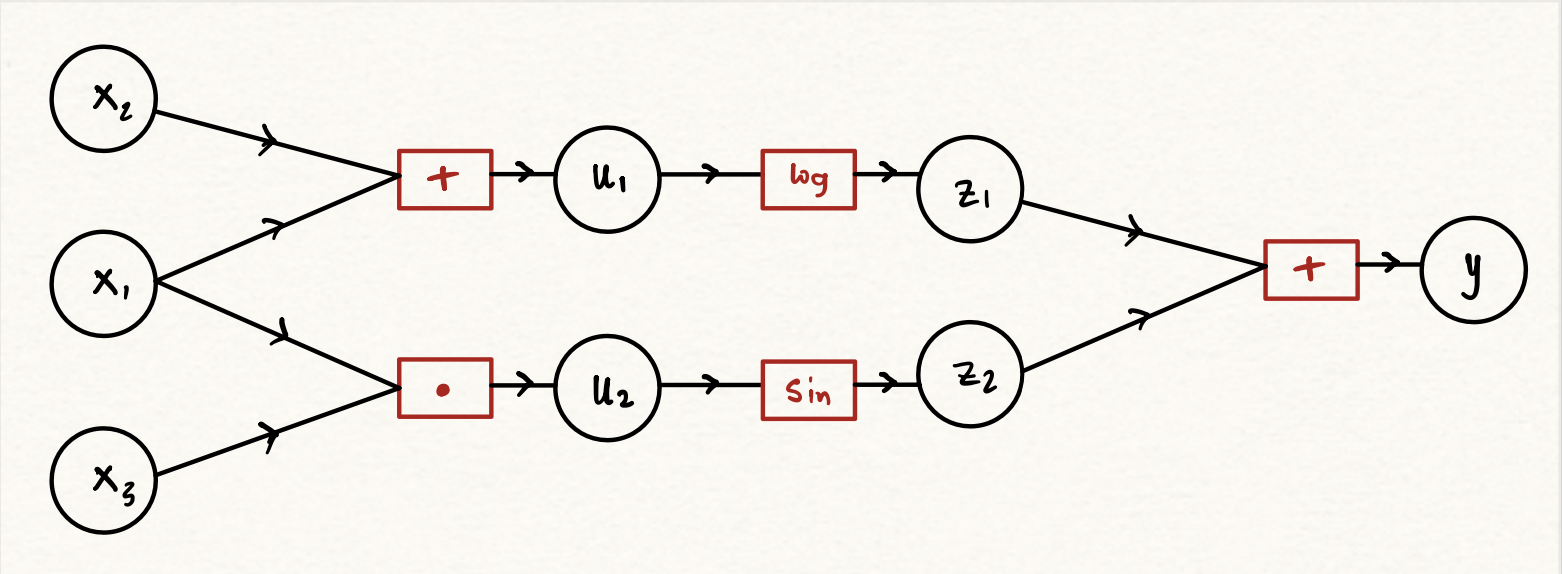

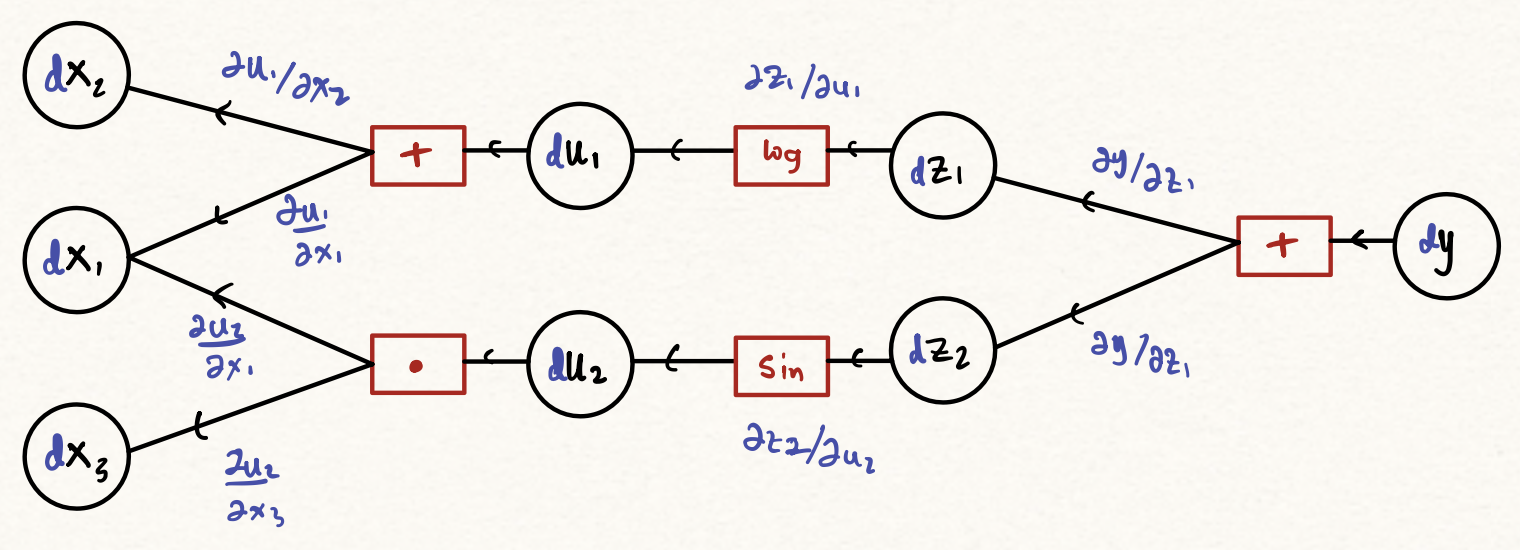

In [2]:
# add graph picture
from IPython.display import Image, display

display(Image('assets/graph-1-apr-7.png',width=600))
display(Image('assets/graph-2-apr-7.png',width=600))

The second graph is a computation graph which shows how to compute the gradient of $y$ with respect to the inputs $x_1,x_2,x_3$. To get this graph:
- Reverse all arrows (i.e. flow of computation now goes from outputs to inputs).
- Re-write each variable as the correpsonding differential.
- Annotate each edge with the partial derivative of the output variable with respect to the input variable.

The **chain rule** now says that in order to compute a particular partial $\partial y/\partial x_i$, we do the following:
- Consider all possible paths (*chains*) from $dy$ to $dx_i$ in the computation graph of differentials.
- For each path, compute the product of the partial derivatives along the path.
- Finally, sum all the products obtained from each path to get the final value of $\partial y/\partial x_i$.

For example, in the graph above, we have the following:
- To compute $\partial y/\partial x_2$, there is only one path, so we have
\begin{align*}
    \frac{\partial y}{\partial x_2} & = \frac{\partial y}{\partial z_1} \cdot \frac{\partial z_1}{\partial u_1} \cdot \frac{\partial u_1}{\partial x_2}\\
    &= 1 \cdot \frac{1}{u_1} \cdot 1 \\
    &= \frac{1}{x_1+x_2}.
\end{align*}
- Similarly, to compute $\partial y/\partial x_3$, there is only one path, so we have:
\begin{align*}
    \frac{\partial y}{\partial x_3} & = \frac{\partial y}{\partial z_2} \cdot \frac{\partial z_2}{\partial u_2} \cdot \frac{\partial u_2}{\partial x_3}\\
    &= 1 \cdot \cos(u_2) \cdot x_1 \\
    &= \cos(x_1x_3) \cdot x_1.
\end{align*}
- To compute $\partial y/\partial x_1$, there are two paths:
    1. $dy \to dz_1 \to du_1 \to dx_1$.
    2. $dy \to dz_2 \to du_2 \to dx_1$.
Thus, we have:
\begin{align*}
    \frac{\partial y}{\partial x_1} & = \left( \frac{\partial y}{\partial z_1} \cdot \frac{\partial z_1}{\partial u_1} \cdot \frac{\partial u_1}{\partial x_1} \right) + \left( \frac{\partial y}{\partial z_2} \cdot \frac{\partial z_2}{\partial u_2} \cdot \frac{\partial u_2}{\partial x_1} \right)\\
    &= 1 \cdot \frac{1}{u_1} \cdot 1 + 1 \cdot \cos(u_2) \cdot x_3\\
    &= \frac{1}{x_1+x_2} + x_3\cos(x_1x_3).
\end{align*}


**Example.** 
Suppose we have a logistic regression model defined by $p = \sigma(w\cdot x + b)$, where $w \in \mathbb{R}^n$ is the weight vector, $x \in \mathbb{R}^n$ is the input, and $b \in \mathbb{R}$ is the bias. Let $y \in \{0,1\}$ denote the true label for the observation $x$, and define the binary cross-entropy loss (or log loss) as:
\begin{equation*}
    L = - \left( y \log(p) + (1-y) \log(1-p) \right).
\end{equation*}
To build a computation graph for the loss $L$ with respect to the inputs $x$, $w$, and $b$, we can proceed as follows:
- For each $i=1,\dotsc,n$, let $u_i = x_i w_i$ (the $i$-th component of the Hadamard product $x*w$).
- Let $z = u_1 + \dotsb + u_n + b$ (i.e. $z = w\cdot x + b$).
Then, we have the following computation graph(s):

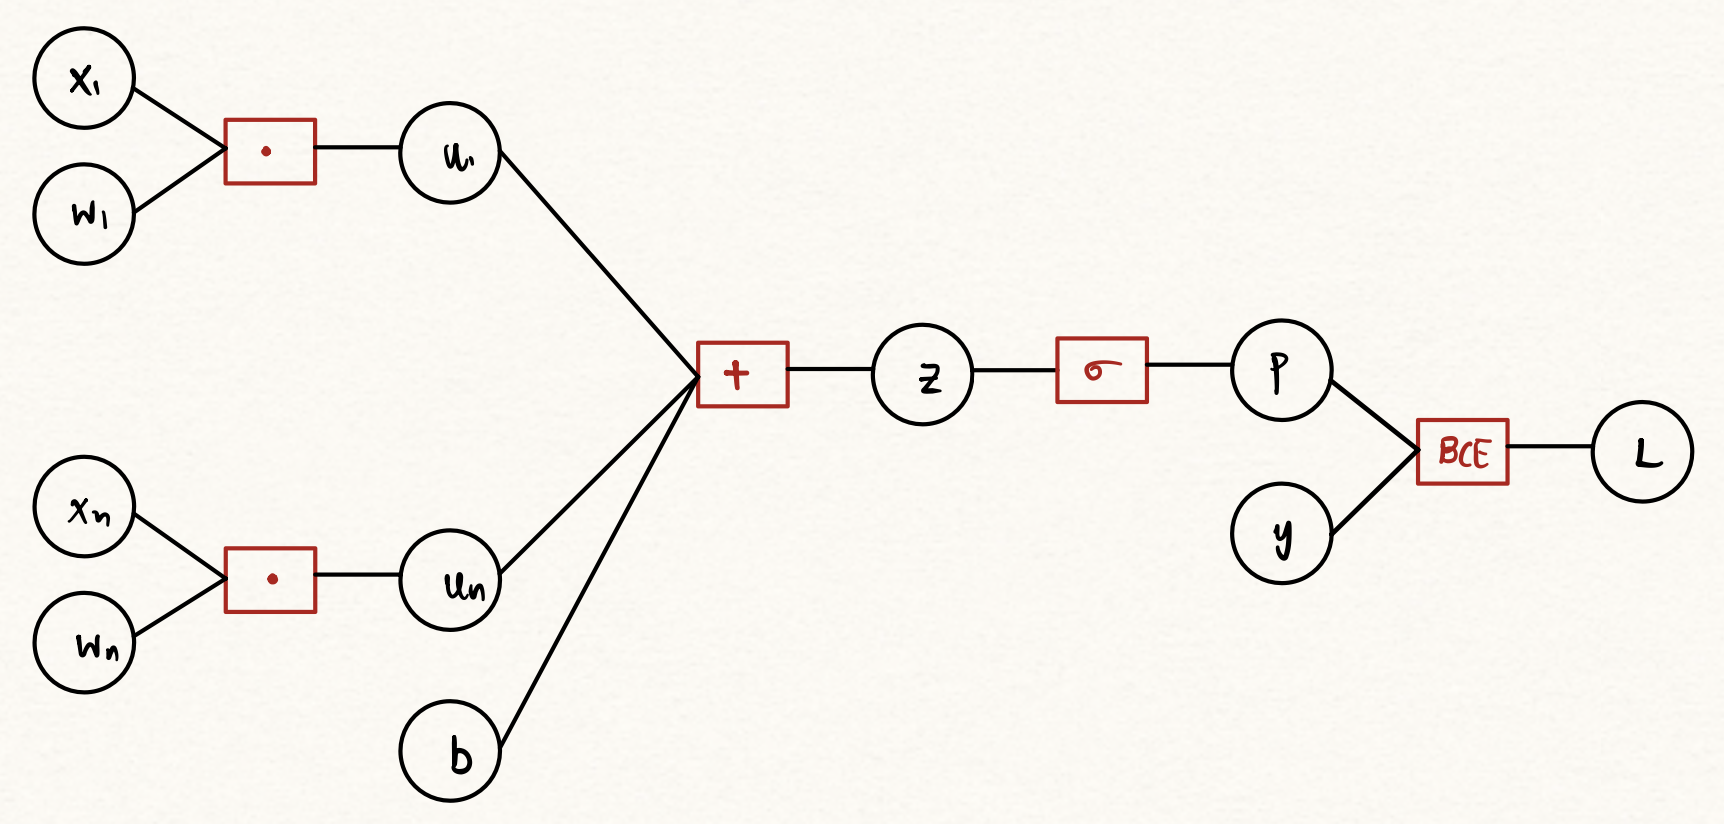

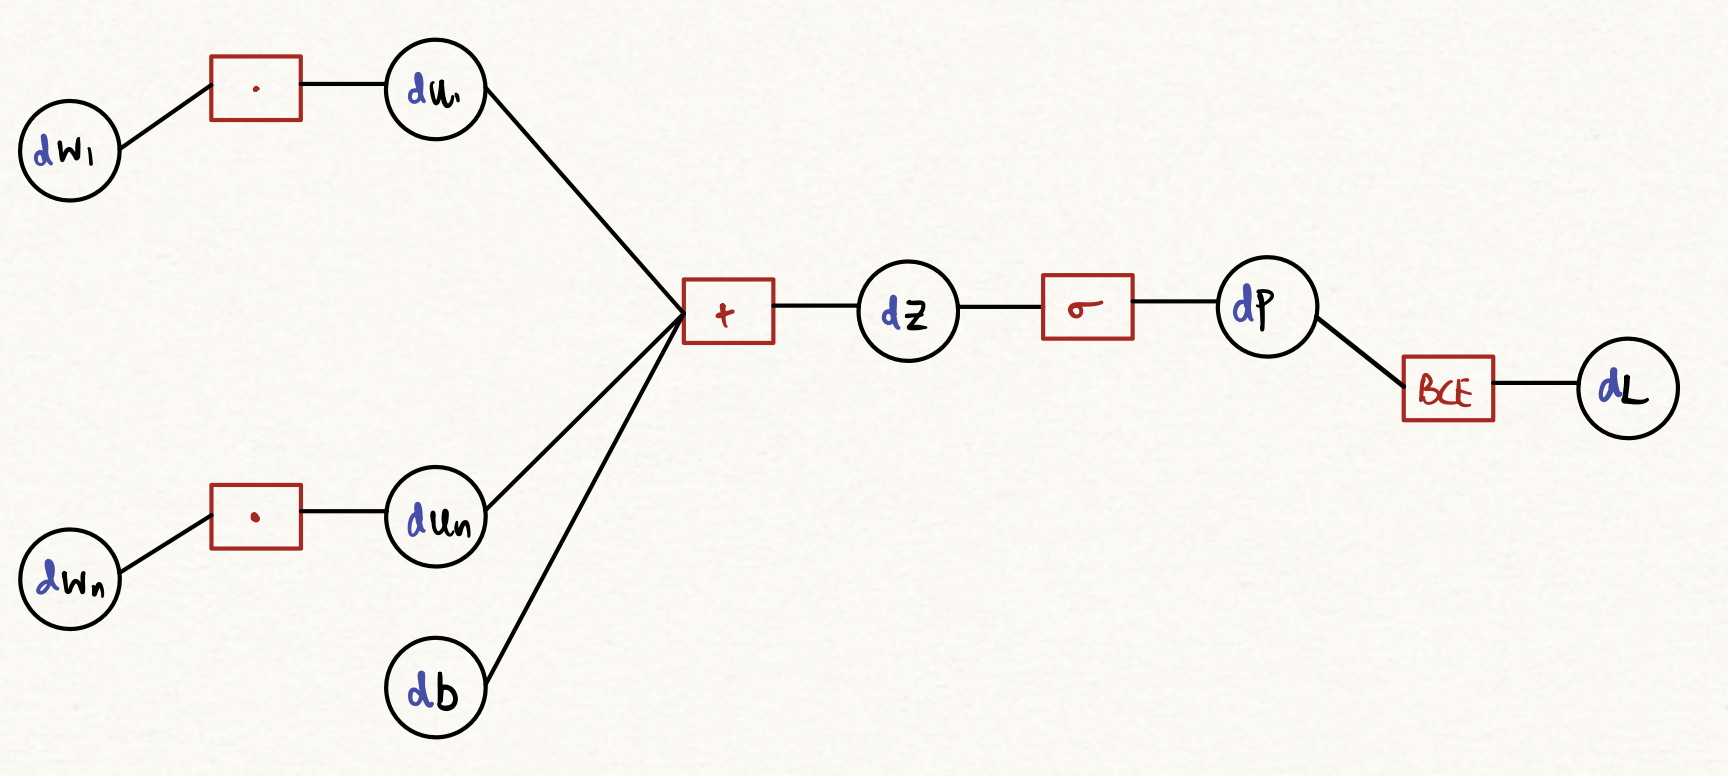

In [5]:
display(Image('assets/graph-3-apr-7.png',width=600))
display(Image('assets/graph-4-apr-7.png',width=600))

NOTE: The arrows go from left-to-right on the first graph and right-to-left on the second (they are ommitted for simplicity). Similarly, I've ommitted the annotations with partial derivatives in the second graph. Finally, note that I've removed the nodes corresponding to $x_1,\dotsc,x_n$ and $y$, because these are fixed constants in the context of computing the gradient of loss with respect to the parameters!

Observe that for each parameter $w_i$ or $b$, there is a single path from $dL$ to $dw_i$ or $db$, respectively. Thus, we can compute the gradients as follows. First, note that
\begin{equation*}
    \frac{\partial L}{\partial p} = - \left( \frac{y}{p} - \frac{1-y}{1-p} \right) = \frac{p-y}{p(1-p)}.
\end{equation*}
Next, note that
\begin{equation*}
    \frac{\partial p}{\partial z} = p(1-p).
\end{equation*}
Finally, note that
\begin{equation*}
    \frac{\partial z}{\partial u_i} = 1 \quad \text{and} \quad \frac{\partial z}{\partial b} = 1.
\end{equation*}
Finally, $\partial u_i/\partial w_i = x_i$. 
Putting it all together, we have:
\begin{equation*}
    \frac{\partial L}{\partial w_i} = \frac{\partial L}{\partial p} \cdot \frac{\partial p}{\partial z} \cdot \frac{\partial z}{\partial u_i}\cdot \frac{\partial u_i}{\partial w_i} = \frac{p-y}{p(1-p)} \cdot p(1-p) \cdot x_i = (p-y)x_i,
\end{equation*}
and
\begin{equation*}
    \frac{\partial L}{\partial b} = \frac{\partial L}{\partial p} \cdot \frac{\partial p}{\partial z} \cdot \frac{\partial z}{\partial b} = \frac{p-y}{p(1-p)} \cdot p(1-p) \cdot 1 = p-y.
\end{equation*}

**Example.**
It is often convenient to allow nodes to represent not only scalar variables, but also vector/matrix/tensor variables. For example, suppose we have a softmax regression model, whose input is $x \in \mathbb{R}^n$ and output is 
\begin{equation*}
    p = \textup{softmax}(Wx + b) \in \Delta_m,
\end{equation*}
where $W \in \mathbb{R}^{m \times n}$ is the weight matrix, $b \in \mathbb{R}^m$ is the bias vector, and $\Delta_m$ denotes the $m$-dimensional probability simplex (i.e. $p_i \geq 0$ for all $i$, and $\sum_{i=1}^m p_i = 1$). Let $L$ denote the categorical cross-entropy loss (or log loss) for the softmax regression model, which is defined as:
\begin{equation*}
    L = - \sum_{i=1}^m y_i \log(p_i),
\end{equation*}
where $y \in \Delta_m$ denotes the true label for the observation $x$ (i.e. a one-hot encoded vector, where $y_i=1$ for the true class and $y_j=0$ for all $j \neq i$).

To build the graph:
- For $i=1,\dotsc,m$, let $w_i$ denote the $i$-th row of $W$, so that $w_i \in \mathbb{R}^n$.
- Let $z_i = w_i \cdot x + b_i$ for $i=1,\dotsc,m$ (i.e. the $i$-th component of the linear function before softmax).
- Let $e_i = e^{z_1}$ for $i=1,\dotsc,m$ (i.e. the exponentials of the linear function before softmax).
- Let $v = e_1 + \dotsb + e_m$ (i.e. the sum of the exponentials).

Then, the final output is 
\begin{equation*}
    p_i = \frac{e_i}{v} \quad \text{for } i=1,\dotsc,m.
\end{equation*}

This leads to the following computation graph(s):

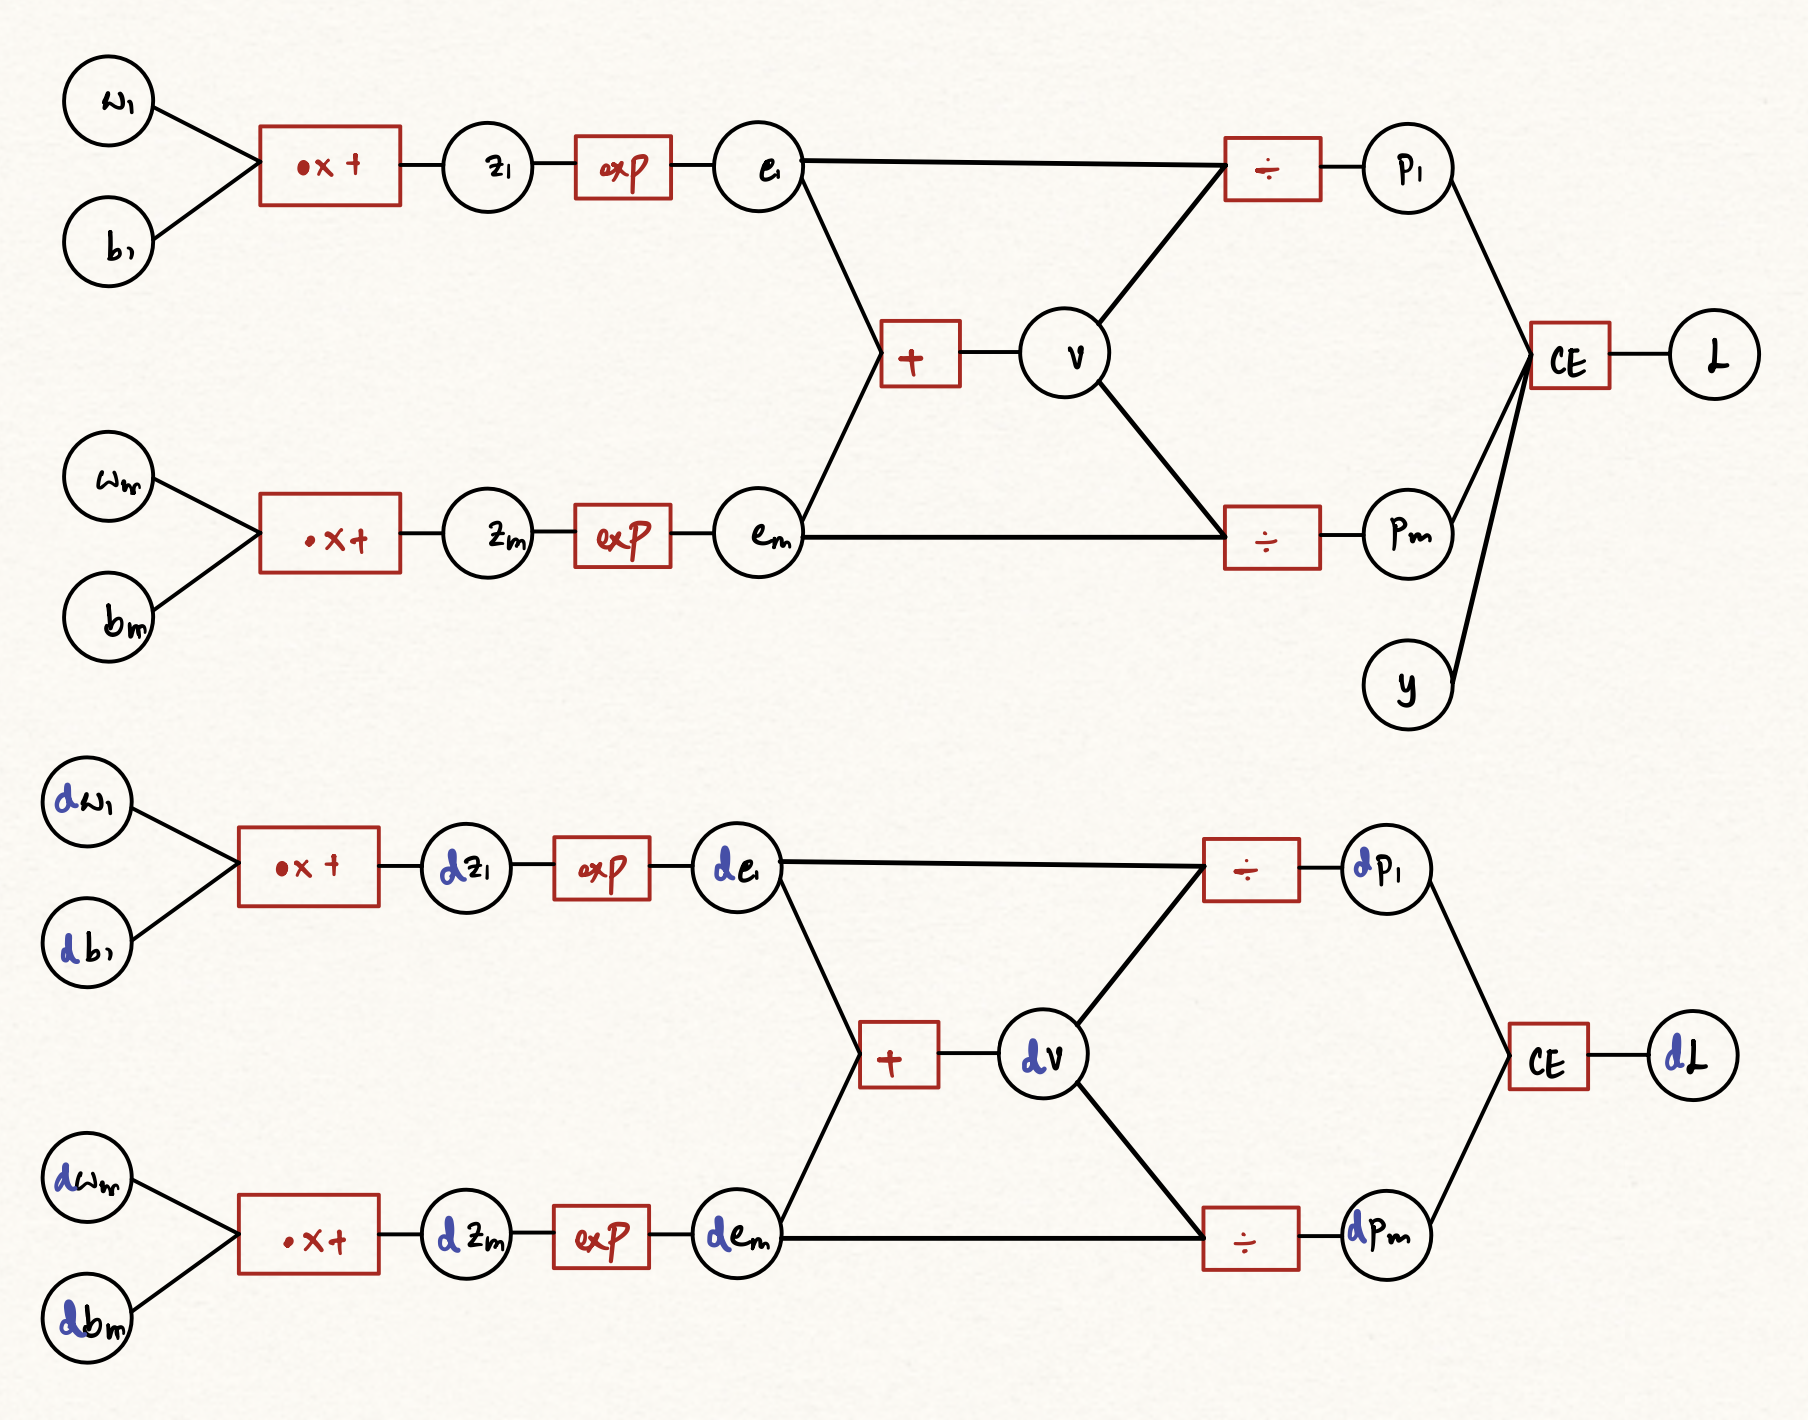

In [11]:
display(Image('assets/graph-5-apr-7.png',width=600))